In [1]:
import scanpy as sc
import scirpy as ir

from genevector.data import GeneVectorDataset
from genevector.embedding import GeneEmbedding, CellEmbedding

import tcri

/Users/nceglia/miniconda3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
adata = ir.datasets.wu2020_3k()

In [3]:
sc.pp.filter_genes(adata, min_cells=10)
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=1000, subset=True) #works on raw counts

In [4]:
dataset = GeneVectorDataset(adata)

Loading Expression.


100%|██████████| 367580/367580 [00:05<00:00, 64292.35it/s]


Reindexing Cooc


100%|██████████| 3000/3000 [00:00<00:00, 20232.04it/s]


In [5]:
embed = GeneEmbedding("wu2020_3k.vec", dataset,vector="average")
print(embed.compute_similarities("CD8A").head(20))

Loading average of 1st and 2nd weights.


100%|██████████| 1000/1000 [00:00<00:00, 2232200.11it/s]


            Gene  Similarity
0           CD8A    1.000000
1           CD8B    0.873796
2           CTSW    0.744265
3           GZMH    0.743593
4           PRF1    0.703551
5           HOPX    0.689219
6         ZNF683    0.677319
7          PCBP1    0.672641
8         CCL4L1    0.669333
9           NKG7    0.660229
10        PIK3R1    0.652857
11         GSTP1    0.652301
12  LOC101060038    0.650925
13      APOBEC3G    0.641123
14           ID2    0.630459
15       ZFP36L2    0.625061
16          IFNG    0.623185
17         KLRC2    0.620998
18          ENO1    0.620198
19         CALM3    0.616685


In [6]:
cembed = CellEmbedding(dataset, embed)
adata = cembed.get_adata()

100%|██████████| 3000/3000 [00:03<00:00, 966.82it/s] 


In [7]:
import pandas
markers = cembed.get_predictive_genes(adata,"cluster_orig",n_genes=10)
pandas.DataFrame.from_dict(markers).T

,0,1,2,3,4,5,6,7,8,9
8.2-Tem,NKG7,CCL4L1,CD8A,GZMK,CCL4L2,GZMH,CD8B,CCL3,CST7,GZMB
4.4-FOS,LTB,DNAJB1,ICOS,DUSP1,AQP3,KLF6,PPIF,BTG2,FAAH2,PASK
4.1-Trm,IL21,TNFRSF18,TNFRSF4,LOC101928173,CTLA4,TK1,MCM5,CD82,GEM,HIST1H2BH
8.3c-Trm,GZMH,GZMB,CCL3,CD8B,CD8A,HOPX,PRF1,CTSW,NKG7,ZNF683
4.3-TCF7,LTB,AQP3,PASK,MAL,FAAH2,CCR7,LEF1,MYC,SELL,TNFRSF25
8.1-Teff,GZMH,NKG7,PTGDS,FGFBP2,CCL3,GZMB,PRF1,KLRD1,CD8A,CTSW
3.1-MT,CD8A,CCL3L1,KLRC4,SPON2,FGFBP2,NKG7,CCL4L1,KLRK1,CD8B,KLRD1
4.2-RPL32,ADTRP,LEF1,H1F0,ADAM19,CCR6,FXYD7,ITPRIPL2,NGFRAP1,SDC4,PAICS
8.3b-Trm,KLRC2,KLRD1,ZNF683,CCL3,HOPX,GZMH,CD8A,CCL4L1,CD8B,LOC101060038
8.4-Chrom,IL1B,TOB1,IGLL5,LOC102725018,IL17A,S100A9,AURKB,IL21,MTRNR2L2,S100A8


In [8]:
adata = cembed.phenotype_probability(adata,markers)

100%|██████████| 3000/3000 [00:00<00:00, 47272.37it/s]

8.2-Tem
4.4-FOS
4.1-Trm
8.3c-Trm
4.3-TCF7
8.1-Teff
3.1-MT
4.2-RPL32
8.3b-Trm
8.4-Chrom
4.6a-Treg
8.6-KLRB1
8.3a-Trm
8.5-Mitosis
4.6b-Treg
4.5-IL6ST



/Users/nceglia/miniconda3/lib/python3.9/site-packages/genevector-0.0.1-py3.9.egg/genevector/embedding.py:587: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


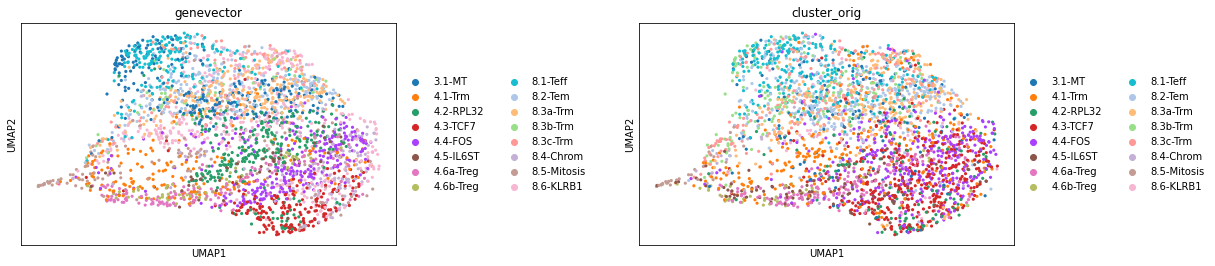

In [9]:
sc.pl.umap(adata,color=["genevector","cluster_orig"],wspace=0.5)

In [10]:
sample_column="sample"
condition_column="source"
phenotype_column="genevector"

tcri.pp.joint_distribution(adata,
                           sample_column=sample_column, 
                           condition_column=condition_column, 
                           phenotype_column=phenotype_column)

100%|████████████| 24/24 [00:00<00:00, 146.80it/s]


['CASSYQGATEAFF',
 'CASTLTGGLDTEAFF',
 'CASSGGYYNEQFF',
 'CASSIDGPGTSVWSSYNEQFF',
 'CASSPGTSVREQYF',
 'CASSFRGTGELFF',
 'CASSYGLSWGSYEQYF',
 'CASSLASGMNTEAFF',
 'CASSRTGGDSGELFF']

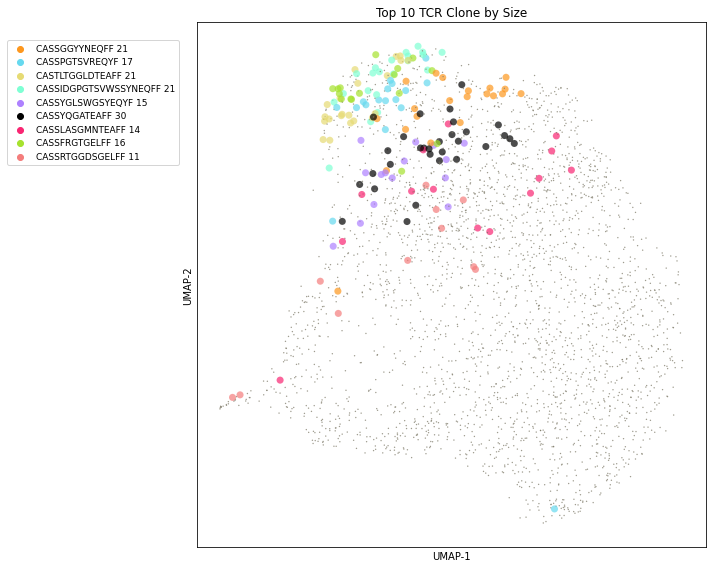

In [11]:
tcri.pl.tcr_umap(adata)

In [12]:
tcri.tl.clonotypic_entropy(adata,"4.3-TCF7")

0.9776064296025908

In [13]:
tcri.tl.clonotypic_entropy(adata,"8.1-Teff")

0.7281716622684322

/Users/nceglia/miniconda3/lib/python3.9/site-packages/tcri-0.0.1-py3.9.egg/tcri/metrics/_metrics.py:26: RuntimeWarning: invalid value encountered in double_scalars


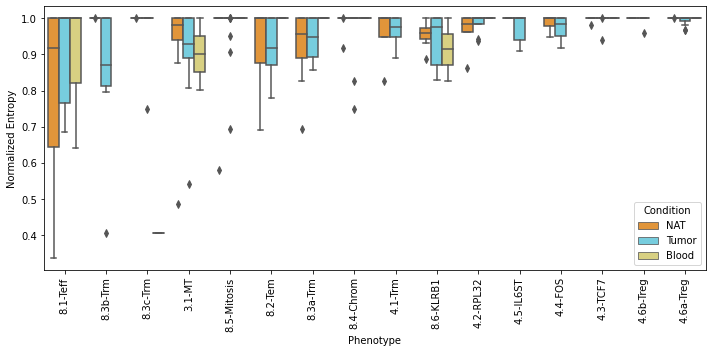

In [14]:
tcri.pl.clonotypic_entropy(adata)

In [15]:
tcri.metrics.phenotypic_entropy(adata)

{'CASRAAGGAFEQFF': 1.0,
 'CASSRTGGDSGELFF': 0.5725871052220262,
 'CASSGDGMNTEAFF': 0.579380164285695,
 'CASSEYWAKTQYF': 0.4181656600790517,
 'CAILQRASSYNEQFF': 0.30744974986419643,
 'CASSAGLAAYNEQFF': 1.0,
 'CASSYSSTSGLRNEQFF': 0.4056390622295664,
 'CASSWNSEQYF': -0.0,
 'CASSGIEGLEQYF': 0.579380164285695,
 'CASGLRPNEQFF': 0.4181656600790517,
 'CASSFQGAYEQYF': 0.579380164285695,
 'CSARDRDRGRIDEQYF': 0.579380164285695,
 'CRRGSTGELFF': 0.75,
 'CASSPGTSVREQYF': 0.37802232269989117,
 'CASSFRGTGELFF': 0.3246987351738497,
 'CASSQVGDHEQYF': 0.579380164285695,
 'None': 0.49177502403368695,
 'CAWKDRGYEQFF': 0.579380164285695,
 'CASSYLGSNQPQHF': 0.579380164285695,
 'CASSLPEGRERFRSVNSYEQYF': 0.579380164285695,
 'CASSLDYAGIRDGYTF': 0.5833333333333334,
 'CASRMDSNQPQHF': 1.0,
 'CSAPAGTKQFF': 1.0,
 'CASSETGGEGYGYTF': 0.579380164285695,
 'CASSMTQGWNSPLHF': 0.6387640052032226,
 'CASSLRPYNEQFF': 1.0,
 'CASSSHGGSYEQYF': 0.6846565531077589,
 'CASSYSFLDTEAFF': 1.0,
 'CASTGTSGGYEQFF': 1.0,
 'CASGGDTEAFF': -0

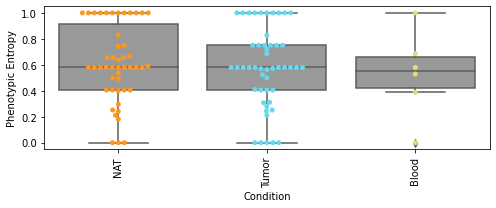

In [16]:
tcri.pl.phenotypic_entropy(adata)

In [17]:
tcri.metrics.phenotypic_flux(adata,from_this="NAT",to_that="Tumor",min_clone_size=50)

100%|██████████| 2194/2194 [00:32<00:00, 67.25it/s]


,Pre,Post,Phenotype A,Phenotype B
0,0.008814,0.008075,4.2-RPL32,4.2-RPL32
1,0.008814,0.002484,4.2-RPL32,4.3-TCF7
2,0.008814,0.001863,4.2-RPL32,8.3c-Trm
3,0.008814,0.003727,4.2-RPL32,8.1-Teff
4,0.008814,0.006832,4.2-RPL32,4.4-FOS
...,...,...,...,...
219,0.003205,0.003727,8.4-Chrom,4.6a-Treg
220,0.003205,0.005590,8.4-Chrom,8.3a-Trm
221,0.003205,0.006211,8.4-Chrom,8.5-Mitosis
222,0.003205,0.004969,8.4-Chrom,3.1-MT


100%|██████████| 2194/2194 [00:33<00:00, 65.21it/s]


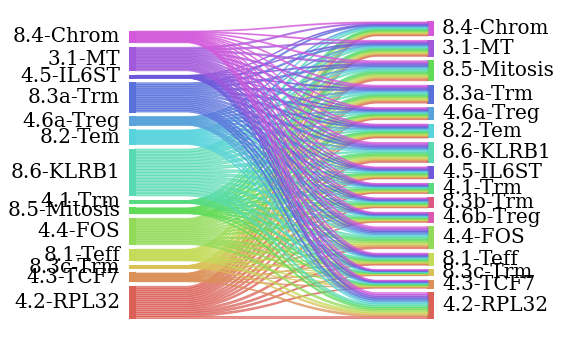

In [18]:
tcri.pl.phenotypic_flux(adata,from_this="NAT",to_that="Tumor",min_clone_size=100)